In [156]:
import pandas as pd
df = pd.read_csv('./housing.csv')

In [157]:
datos = df.dropna() 

In [158]:
#datos dummies
dummies = pd.get_dummies(datos['ocean_proximity'], dtype=int)

In [159]:
datos = pd.concat([datos, dummies], axis=1)

In [160]:
datos.drop('ocean_proximity', axis=1, inplace=True)

In [161]:
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [162]:
datos['room_ratio'] = datos['total_rooms'] / datos['total_bedrooms'] 

In [163]:
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,room_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.821705
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.418626
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,7.721053
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.421277
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,5.810714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,4.451872
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,4.646667
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,4.647423
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,4.547677


In [164]:
X = datos.drop('median_house_value', axis=1)
y = datos['median_house_value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [174]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

modeloTree = DecisionTreeRegressor(max_depth=10)

modeloTree.fit(X_train, y_train)
predicciones = modeloTree.predict(X_test)

score_test = modeloTree.score(X_test, y_test)
score_train = modeloTree.score(X_train, y_train)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print(f"Score test: {score_test}")
print(f"Score train: {score_train}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Score test: 0.7085014047329217
Score train: 0.8263093628619562
Mean Squared Error: 61474.84763029883
R2 Score: 0.7085014047329217


|--- median_income <= 5.08
|   |--- INLAND <= 0.50
|   |   |--- median_income <= 3.05
|   |   |   |--- median_income <= 2.21
|   |   |   |   |--- room_ratio <= 3.23
|   |   |   |   |   |--- longitude <= -118.27
|   |   |   |   |   |   |--- households <= 1200.50
|   |   |   |   |   |   |   |--- latitude <= 33.75
|   |   |   |   |   |   |   |   |--- latitude <= 33.55
|   |   |   |   |   |   |   |   |   |--- value: [450000.00]
|   |   |   |   |   |   |   |   |--- latitude >  33.55
|   |   |   |   |   |   |   |   |   |--- value: [350000.00]
|   |   |   |   |   |   |   |--- latitude >  33.75
|   |   |   |   |   |   |   |   |--- median_income <= 0.70
|   |   |   |   |   |   |   |   |   |--- total_rooms <= 263.50
|   |   |   |   |   |   |   |   |   |   |--- value: [67500.00]
|   |   |   |   |   |   |   |   |   |--- total_rooms >  263.50
|   |   |   |   |   |   |   |   |   |   |--- value: [500001.00]
|   |   |   |   |   |   |   |   |--- median_income >  0.70
|   |   |   |   |   |   |   |   |  

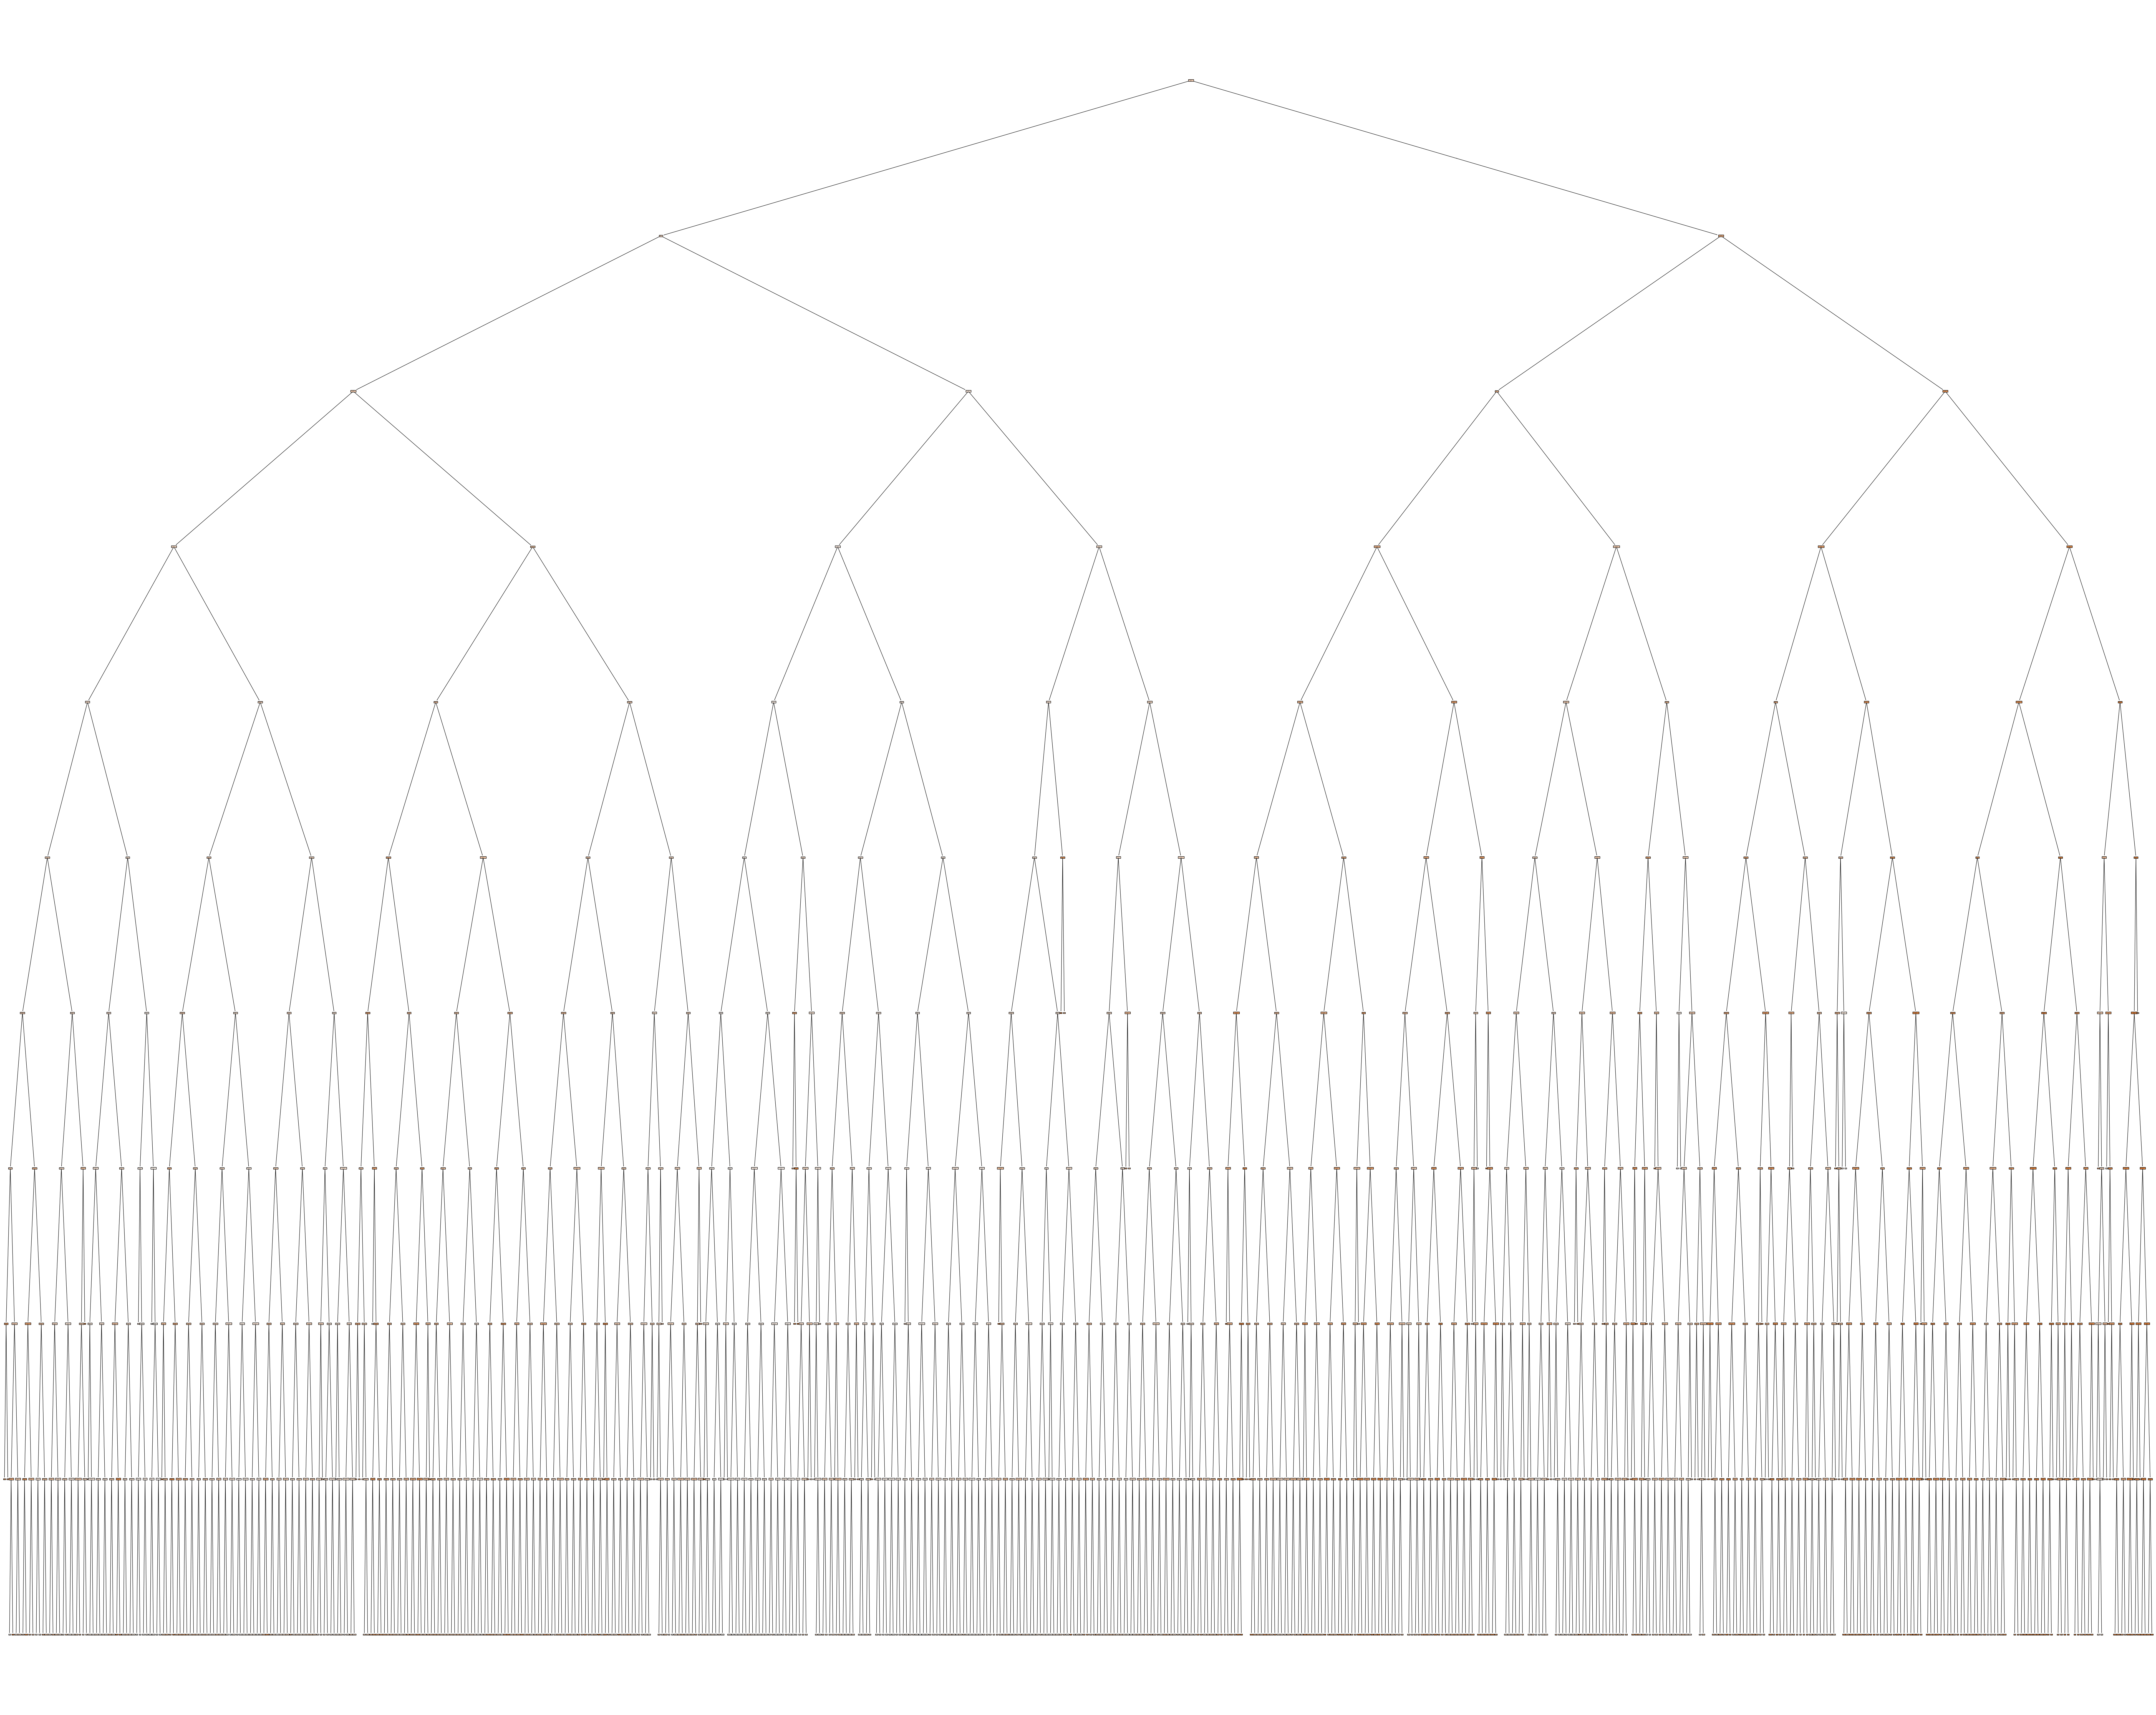

In [175]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))

plot_tree(
    modeloTree,
    filled=True,
    feature_names=X_train.columns,
    label='none'
)

from sklearn.tree import export_text

tree_rules = export_text(modeloTree, feature_names=list(X_train.columns))
print(tree_rules)


ANALISIS DE DATOS PARA AUMENTAR LA PRECISION DEL MODELO        


In [176]:
datos['rooms_per_household'] = datos['total_rooms'] / datos['households']
datos['income_per_capita'] = datos['median_income'] / datos['population']

In [177]:
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,room_ratio,rooms_per_household,income_per_capita
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.821705,6.984127,0.025855
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.418626,6.238137,0.003457
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,7.721053,8.288136,0.014632
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.421277,5.817352,0.010113
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,5.810714,6.281853,0.006807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,4.451872,5.045455,0.001847
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,4.646667,6.114035,0.007182
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,4.647423,5.205543,0.001688
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,4.547677,5.329513,0.002520


In [178]:
import numpy as np
bins = [0, 50, np.inf]
labels = ['0-50', '50+']
datos['age_bins'] = pd.cut(datos['housing_median_age'], bins=bins, labels=labels, right=False)

In [179]:
age_bins_dummies = pd.get_dummies(datos['age_bins'], prefix='age_bin', dtype=int)
datos = pd.concat([datos, age_bins_dummies], axis=1)
datos.drop('age_bins', axis=1, inplace=True)

In [180]:
bins = [0, 10, 15, np.inf]
labels = ['0-10', '10-15', '15+']
datos['income_bins'] = pd.cut(datos['median_income'], bins=bins, labels=labels, right=False)

In [181]:
income_bins_dummies = pd.get_dummies(datos['income_bins'], prefix='income_bin', dtype=int)
datos = pd.concat([datos, income_bins_dummies], axis=1)
datos.drop('income_bins', axis=1, inplace=True)

In [182]:
bins = [0, 500000, np.inf]
labels = ['0-500k', '500k+']
datos['value_bins'] = pd.cut(datos['median_house_value'], bins=bins, labels=labels, right=False)

In [183]:
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,...,NEAR OCEAN,room_ratio,rooms_per_household,income_per_capita,age_bin_0-50,age_bin_50+,income_bin_0-10,income_bin_10-15,income_bin_15+,value_bins
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,...,0,6.821705,6.984127,0.025855,1,0,1,0,0,0-500k
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,...,0,6.418626,6.238137,0.003457,1,0,1,0,0,0-500k
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,...,0,7.721053,8.288136,0.014632,0,1,1,0,0,0-500k
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,...,0,5.421277,5.817352,0.010113,0,1,1,0,0,0-500k
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,...,0,5.810714,6.281853,0.006807,0,1,1,0,0,0-500k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,...,0,4.451872,5.045455,0.001847,1,0,1,0,0,0-500k
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,...,0,4.646667,6.114035,0.007182,1,0,1,0,0,0-500k
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,...,0,4.647423,5.205543,0.001688,1,0,1,0,0,0-500k
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,...,0,4.547677,5.329513,0.002520,1,0,1,0,0,0-500k


In [184]:
value_bins_dummies = pd.get_dummies(datos['value_bins'], prefix='value_bin', dtype=int)
datos = pd.concat([datos, value_bins_dummies], axis=1)
datos.drop('value_bins', axis=1, inplace=True)
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,...,room_ratio,rooms_per_household,income_per_capita,age_bin_0-50,age_bin_50+,income_bin_0-10,income_bin_10-15,income_bin_15+,value_bin_0-500k,value_bin_500k+
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,...,6.821705,6.984127,0.025855,1,0,1,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,...,6.418626,6.238137,0.003457,1,0,1,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,...,7.721053,8.288136,0.014632,0,1,1,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,...,5.421277,5.817352,0.010113,0,1,1,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,...,5.810714,6.281853,0.006807,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,...,4.451872,5.045455,0.001847,1,0,1,0,0,1,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,...,4.646667,6.114035,0.007182,1,0,1,0,0,1,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,...,4.647423,5.205543,0.001688,1,0,1,0,0,1,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,...,4.547677,5.329513,0.002520,1,0,1,0,0,1,0


In [185]:
datos.drop('age_bin_0-50', axis=1, inplace=True)
datos.drop('age_bin_50+', axis=1, inplace=True)

In [186]:
X = datos.drop('median_house_value', axis=1)
y = datos['median_house_value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [187]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo.fit(X_train_scaled, y_train)
predicciones = modelo.predict(X_test_scaled)

score_test = modelo.score(X_test_scaled, y_test)
score_train = modelo.score(X_train_scaled, y_train)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)
    
print(f"Score test: {score_test}")
print(f"Score train: {score_train}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Score test: 0.7404106909174721
Score train: 0.724562142580495
Mean Squared Error: 58715.8450481304
R2 Score: 0.7404106909174721


ARBOL DE DECISION

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [190]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

max_depth_values = range(5, 21)

for max_depth in max_depth_values:
    modeloTree = DecisionTreeRegressor(max_depth=max_depth)
    modeloTree.fit(X_train, y_train)
    predicciones = modeloTree.predict(X_test)

    score_test = modeloTree.score(X_test, y_test)
    score_train = modeloTree.score(X_train, y_train)
    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    r2 = r2_score(y_test, predicciones)

    print(f"Max Depth: {max_depth}, Score test: {score_test}, Score train: {score_train}, Mean Squared Error: {mse}, R2 Score: {r2}")


Max Depth: 5, Score test: 0.7140315400554087, Score train: 0.7101867307863895, Mean Squared Error: 61487.14748929195, R2 Score: 0.7140315400554087
Max Depth: 6, Score test: 0.7337813231047979, Score train: 0.7366080042329138, Mean Squared Error: 59325.92765113716, R2 Score: 0.7337813231047979
Max Depth: 7, Score test: 0.7542103496824977, Score train: 0.7629716190040757, Mean Squared Error: 57004.22863788621, R2 Score: 0.7542103496824977
Max Depth: 8, Score test: 0.7671040130609208, Score train: 0.7888785619858505, Mean Squared Error: 55488.92102202597, R2 Score: 0.7671040130609208
Max Depth: 9, Score test: 0.7799746057106932, Score train: 0.8145369512657618, Mean Squared Error: 53933.8820985775, R2 Score: 0.7799746057106932
Max Depth: 10, Score test: 0.7809787247663494, Score train: 0.8385398358084987, Mean Squared Error: 53810.673667026145, R2 Score: 0.7809787247663494
Max Depth: 11, Score test: 0.7799234269173521, Score train: 0.8649612323046298, Mean Squared Error: 53940.1543530167,

In [193]:
from sklearn.tree import DecisionTreeRegressor

modeloTree = DecisionTreeRegressor(max_depth=15)

modeloTree.fit(X_train, y_train)
predicciones = modeloTree.predict(X_test)

score_test = modeloTree.score(X_test, y_test)
score_train = modeloTree.score(X_train, y_train)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print(f"Score test: {score_test}")
print(f"Score train: {score_train}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")



Score test: 0.7494250656248951
Score train: 0.9502775246692385
Mean Squared Error: 57556.462018354796
R2 Score: 0.7494250656248951


In [192]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))

plot_tree(
    modeloTree, 
    filled=True, 
    feature_names=X_train.columns,
    label ='none'
)

[Text(0.3313149983636237, 0.9761904761904762, 'value_bin_0-500k <= 0.5\n13350597260.646\n16346\n206671.048'),
 Text(0.0009355488214118652, 0.9285714285714286, 'room_ratio <= 4.009\n0.027\n778\n500000.972'),
 Text(0.1661252735925178, 0.9523809523809523, 'True  '),
 Text(0.0003660843214220342, 0.8809523809523809, 'latitude <= 33.725\n0.154\n79\n500000.81'),
 Text(0.00016270414285423742, 0.8333333333333334, 'households <= 585.5\n0.188\n4\n500000.25'),
 Text(8.135207142711871e-05, 0.7857142857142857, '0.0\n1\n500001.0'),
 Text(0.00024405621428135615, 0.7857142857142857, '0.0\n3\n500000.0'),
 Text(0.000569464499989831, 0.8333333333333334, 'longitude <= -122.445\n0.134\n75\n500000.84'),
 Text(0.00040676035713559355, 0.7857142857142857, 'median_income <= 3.332\n0.188\n4\n500000.25'),
 Text(0.00032540828570847485, 0.7380952380952381, 'income_per_capita <= 0.003\n0.25\n2\n500000.5'),
 Text(0.00024405621428135615, 0.6904761904761905, '0.0\n1\n500000.0'),
 Text(0.00040676035713559355, 0.690476190

Error in callback <function flush_figures at 0x0000021693FDD760> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Aplique el modelo del arbol de decision con un max_depth de 10, ya que fue la profundidad que mejor score obtuvo en el set de prueba, evaluado en el ciclo for. El modelo de arbol de decision para regresión alcanzo un score de 0.70 en el conjunto de prueba, mientras que el modelo de regresion lineal alcanzo un score de 0.65, sin hacer ninguna modificación a los datos ademas de los aplicados en clase. Algo a tener en cuenta es que el modelo de arbol de decision tiene un score de 0.82 en el conjunto de entrenamiento, lo que indica que el modelo esta sobreajustado. Esto significa que el modelo ha aprendido patrones específicos del conjunto de entrenamiento que no generalizan tan bien a datos nuevos.

El grafico del arbol al haber demasiadas caracteristicas, no se puede visualizar correctamente, quizas este modelo no sea el mas adecuado para este caso.El modelo de regresión lineal es mas facil de interpretar y de explicar graficamente, por lo que en un caso de negocio de ventas de casas, podría ser preferible a este otro modelo.

Después volví a aplicar el arbol de decision con un max_depth de 15, pero esta vez agregando mas features al modelo, como la relacion de cuartos por hogar y la relacion de ingreso por persona; asi como tambien aplique la tecnica de binning pero reduciendo la cantidad de intervalos o rangos para evitar que hubieran demasiadas caracteristicas. El score del modelo de arbol de decision en el conjunto de prueba fue de 0.74, pero el score en el set de entrenamiento fue de 0.95, lo que indica que el modelo esta aún mas sobreajustado.






